# Data Preparation

### Anmerkung
Das Skript basiert auf Tim Feldmüllers Anwendung von TWEC, die unter dem folgenden GitLab-Link aufgerufen werden kann: https://gitlab.uzh.ch/zukoko/sommerschule-2023/-/tree/master/C5-Distributionelle-Semantik/TWEC_Clustering/scripts?ref_type=heads 

In [ ]:
pip install -r requirements.txt

### Vergleich zwischen Quellen
Im unteren Beispiel kann eine .csv Datei eingelesen werden, welche die Texte nach der *text_source* sortiert. Je länger die Liste, desto länger dauert die Berechnung.

In [36]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "./subcorpus_tp1.csv"  # Update with the actual file path

# Load the CSV file using pandas
df = pd.read_csv(csv_file_path, sep='\t')

# Define search words for each corpus as a list
corpora = ['FAZ', 'BILD']  # Add as many as needed

# Initialize a dictionary to store text content for each corpus
sentences_corpus = {corpus: [] for corpus in corpora}

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    channel_id = row['text_source']
    message = row['text_content']
    
    # Check and store messages for each corpus
    for corpus in corpora:
        if corpus in channel_id:
            sentences_corpus[corpus].append(message)

### Vergleich zwischen Zeiträumen
Im unteren Beispiel kann eine .csv Datei eingelesen werden, welche die Texte nach dem Metadatum *text_date* sortiert. Je länger die Liste, desto länger dauert die Berechnung. Man kann verschiedene Zeiträume setzen, welche die betreffende Fragestellung beleuchtet.

In [7]:
import pandas as pd
from datetime import datetime

# Function to parse dates
def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%Y-%m'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

# Define your time frames as a dictionary with corpus names as keys
time_frames = {
    'korpus1': (parse_date('01-01-2020'), parse_date('31-01-2020')),
    'korpus2': (parse_date('01-09-2010'), parse_date('30-09-2010')),
    'korpus3': (parse_date('01-09-2000'), parse_date('30-09-2000')),
    # Add more time frames as needed
}

# Initialize your sentences_corpus dictionary
sentences_corpus = {key: [] for key in time_frames.keys()}

# Specify the path to your CSV file
csv_file_path = "./subcorpus_tp1.csv"  # Update with the actual file path

# Load your DataFrame
df = pd.read_csv(csv_file_path, sep='\t')  # Replace with your actual file path

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    try:
        channel_date = parse_date(row['text_date'])
    except ValueError:
        continue  # Skip rows with invalid date formats

    message = row['text_content']

    # Check each corpus defined in time_frames
    for corpus_name, (start_date, end_date) in time_frames.items():
        if start_date <= channel_date <= end_date:
            sentences_corpus[corpus_name].append(message)

### Vergleich zwischen Korpora

In [2]:

import pandas as pd
# Specify the path to your CSV file
import os

csv_file_name = "telegram_data.csv"  # Update with the actual file name
csv_file_path = os.path.join(os.getcwd(), csv_file_name)

# Define lists to store text content
sentences_korpus1 = []

# Load the CSV file using pandas
df = pd.read_csv(csv_file_path)

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    channel_id = row['channel_id']
    message = row['message']
    sentences_korpus1.append(message)

In [3]:
# Specify the path to your CSV file

csv_file_name = "subcorpus_tp1.csv"  # Update with the actual file name
csv_file_path = os.path.join(os.getcwd(), csv_file_name)

# Define lists to store text content
sentences_korpus2 = []

# Load the CSV file using pandas
df = pd.read_csv(csv_file_path, sep='\t', low_memory=False)

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    message = row['text_content']
    sentences_korpus2.append(message)


### Tokenization
Hier findet eine Tokenisierung der Daten mithilfe von *nltk* oder *spacy* statt.

In [8]:
from nltk import word_tokenize

# Assuming you have a dictionary of sentences for each corpus
#sentences_corpus = {'korpus1': ['hallo'], 'korpus2': ['hoi']}

# Initialize a dictionary to store tokenized sentences for each corpus
tokenized_corpus = {corpus: [] for corpus in sentences_corpus}

# Tokenize sentences for each corpus
for corpus, sentences in sentences_corpus.items():
    for sent in sentences:
        if type(sent) is str:
            tokenized_corpus[corpus].append(word_tokenize(sent, language="german"))
# Save the tokenized sentences to separate files for each corpus
for corpus, tokenized_sentences in tokenized_corpus.items():
    with open(f"./data/sentences_{corpus}.txt", "w") as f:
        for sent in tokenized_sentences:
            f.write(" ".join(sent) + "\n")

# Optionally, save all tokenized sentences in a single file
with open("./data/all_sentences.txt", "w") as f:
    for tokenized_sentences in tokenized_corpus.values():
        for sent in tokenized_sentences:
            f.write(" ".join(sent) + "\n")


In [13]:
import spacy

# Load the German language model
nlp = spacy.load("de_core_news_sm")

# Assuming you have a dictionary of sentences for each corpus
# sentences_corpus = {'korpus1': [...], 'korpus2': [...], ...}

# Initialize a dictionary to store tokenized sentences for each corpus
tokenized_corpus = {corpus: [] for corpus in sentences_corpus}

# Tokenize sentences for each corpus using spaCy
for corpus, sentences in sentences_corpus.items():
    for sent in sentences:
        if type(sent) is str:
            doc = nlp(sent)
            tokenized_sentence = [token.text for token in doc]
            tokenized_corpus[corpus].append(tokenized_sentence)

# Save the tokenized sentences to separate files for each corpus
for corpus, tokenized_sentences in tokenized_corpus.items():
    with open(f"../data/sentences_{corpus}.txt", "w") as f:
        for sent in tokenized_sentences:
            f.write(" ".join(sent) + "\n")

# Optionally, save all tokenized sentences in a single file
with open("../data/all_sentences.txt", "w") as f:
    for tokenized_sentences in tokenized_corpus.values():
        for sent in tokenized_sentences:
            f.write(" ".join(sent) + "\n")


: 

### Dictionary mit Frequenzen

In [9]:
# Eine Hilfsfunktion, die ein Dictionary nach seinen Werten sortiert
def sort_dict(dic, reverse=True):
    return dict(sorted(dic.items(), key=lambda item: item[1], reverse=reverse))


# Mit dieser Funktion können wir eine für TWEC aufbereitete Textdatei einlesen, die enthaltenen Types auszählen lassen und bekommen ein nach Frequenz sortiertes
# Dictionary zurück
def get_word_frequencies(path_to_txt):
    frequencies = {}

    with open(path_to_txt, "r") as f:
        for line in f.readlines():
            for word in line.split():
                if word in frequencies:
                    frequencies[word] += 1
                else:
                    frequencies[word] = 1

    return sort_dict(frequencies)
print("done")

done


In [11]:
# Assuming you have a function get_word_frequencies(file_path) defined

# List of corpus names
# Initialize a dictionary to store frequency dictionaries for each corpus
freqs = {}

# Create frequency dictionaries for each corpus

for corpus, sentences in sentences_corpus.items():
    file_path = f"./data/sentences_{corpus}.txt"
    freqs[corpus] = get_word_frequencies(file_path)

print("done")


done


# TWEC

Das Initialisieren von TWEC passiert hier. Wir legen fest, wie viele Dimensionen unsere Word Embeddings haben sollen (size) -> 200–300 sind übliche Werte wie frequent sie mindestens sein müssen (min_count) -> hier nur auf 3 gesetzt, da das Testkorpus sehr klein ist. Es empfehlen sich generell eher höhere Werte, da für sehr niedrigfrequente Wörter nicht genug Informationen erlernbar sind, um sie gut im Vektorraum abbilden zu können wie viele Wörter links und rechts jedes Wortes werden berücksichtigt beim Training (window) -> ähnlich einem Kollokationsfenster, 5 – 6 sind übliche Werte wie viele CPU-Kerne sollen genutzt werden für das Training -> hier automatisch bestimmt (einer weniger als verfügbar)

In [12]:
from twec.twec import TWEC
import multiprocessing

min_count = 5
aligner = TWEC(
    size=300, min_count=min_count, window=6, workers=multiprocessing.cpu_count() - 1
)
print("done")

done


Nun trainieren wir den sogenannten Kompass auf dem Gesamtkorpus. Dieses Kompassmodell dient danach dazu, auch die Vektorräume von Teilkorpora auf die gleiche Art ausrichten zu können, sodass alle Modelle den gleichen Vektorraum nutzen


In [13]:
aligner.train_compass("./data/all_sentences.txt", overwrite=True)

Training the compass.
Compass will be overwritten after training


### Compass

In [14]:
# Das Training ist fertig und wir können das fertige Modell einlesen
from gensim.models.word2vec import Word2Vec

compass = Word2Vec.load("model/compass.model")

# ... und testweise einen Vektor abfragen
compass.wv.most_similar("ich")

[('mir', 0.8544212579727173),
 ('mich', 0.8182902336120605),
 ('Ich', 0.8132672309875488),
 ('alles', 0.7979382276535034),
 ('gesagt', 0.785737156867981),
 ('etwas', 0.7622934579849243),
 ('man', 0.7606101632118225),
 ('nichts', 0.7509281039237976),
 ('jemand', 0.7473022937774658),
 ('niemand', 0.7417084574699402)]

### Slices

In [15]:
# Jetzt geht es an das Training der Subkorpus-Modelle bzw. 'Slices'
# Mit dem For-Loop können wir das Training durchführen, wir müssen nur darauf achten,
# dass wir die Textdateien für das Training nach dem Muster sentences_METADATUM.txt benannt haben
# und die Metadaten in der Liste slices genauso aufführen
# Es passiert außerdem auch ein weiterer Schritt: Und zwar wird von TWEC an dieser Stelle, anders als beim Training des Kompass,
# keine Filterung nach dem Parameter min_count mehr vorgenommen. Daher erstellen wir die TXT Files neu, speichern sie mit dem Suffix _min_count
# und lassen alle Wörter aus, die wir nicht mit einer Mindestfrequenz in unseren Frequency Dictionaries finden
slices = []
for corpus, i in sentences_corpus.items():
    slices.append(corpus)
for slice in slices:
    path_input = f"./data/sentences_{slice}.txt"
    path_output = path_input.replace(".txt", "_min_count.txt")
    with open(path_input, "r") as f:
        with open(path_output, "a") as f_out:
            for sentence in f.readlines():
                min_count_tokens = []
                for word in sentence.split():
                    if freqs[slice][word] >= min_count:
                        min_count_tokens.append(word)
                f_out.write(" ".join(min_count_tokens) + "\n")

    aligner.train_slice(path_output, save=True)

Training temporal embeddings: slice ./data/sentences_korpus1_min_count.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice ./data/sentences_korpus2_min_count.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice ./data/sentences_korpus3_min_count.txt.
Initializing temporal embeddings from the atemporal compass.


### Speichern der Modelle

In [29]:
from gensim.models.word2vec import Word2Vec
import numpy

model_korpus1 = Word2Vec.load("./model/sentences_korpus1_min_count.model")
model_korpus2 = Word2Vec.load("./model/sentences_korpus2_min_count.model")
# weitere Slices können hinzugefügt werden
"""
model_korpusX = Word2Vec.load("./model/sentences_korpusX_min_count.model")

"""

'\nmodel_korpusX = Word2Vec.load("./model/sentences_korpusX_min_count.model")\n\n'

In [30]:
# Jetzt können wir diesen Vektor in den korpus-Modellen abfragen
model_korpus1.wv.most_similar(['Liebe'])

[('Norm', 0.6024266481399536),
 ('Erzählung', 0.5813490152359009),
 ('Erkenntnis', 0.5483028888702393),
 ('Ausstellung', 0.5233314037322998),
 ('Freundin', 0.517431378364563),
 ('Zugehörigkeit', 0.5164638757705688),
 ('Figur', 0.5132883191108704),
 ('Vorgeschichte', 0.5108243823051453),
 ('Ästhetik', 0.5043354630470276),
 ('Balanchine', 0.5025460720062256)]

In [31]:
model_korpus2.wv.most_similar(['Liebe'])

[('Entführung', 0.559239387512207),
 ('Heimat', 0.5341224670410156),
 ('Schwester', 0.527957558631897),
 ('Küche', 0.5145581364631653),
 ('Lehrerin', 0.4896073639392853),
 ('Muttersprache', 0.47060588002204895),
 ('Sprache', 0.46712154150009155),
 ('Männer', 0.4525200128555298),
 ('männlichen', 0.4465506076812744),
 ('Perspektive', 0.4462692439556122)]

## Vergleiche

Mit der Funktion time_machine() können wir diese Schritte bündeln und z.B. abfragen, welches Wort in einem Korpus (Zeit oder Medium) äquivalent zu einem Wort in einem anderen Korpus ist.


In [33]:
import lib
lib.time_machine(model_korpus1, model_korpus2, "Liebe")

[('Verfassung', 0.5866646766662598),
 ('Lehre', 0.5599774122238159),
 ('Ermordung', 0.5452415347099304),
 ('Erwachsenen', 0.5387903451919556),
 ('Kindheit', 0.5378919839859009),
 ('Symbole', 0.5324671864509583),
 ('Entstehung', 0.5321432948112488),
 ('Gemeinschaft', 0.5289644598960876),
 ('Beziehung', 0.5210279226303101),
 ('Synagoge', 0.5190458297729492)]

Mit diesem Befehl können wir alle einzelnen Vektoren unseres Modells als Liste abfragen und sie in der Variable word_vectors speichern.

Bei anderen Versionen von Word2Vec kann der Befehl auch model.wv[model.wv.key_to_index] lauten

In [34]:
words = model_korpus1.wv.vocab.keys()
word_vectors = model_korpus1.wv[words]
print("Anzahl der zu clusternden Vektoren:", len(word_vectors))

Anzahl der zu clusternden Vektoren: 7966


Diese Zelle dient nur dazu, ein Sample aus den Vektoren zu erstellen, damit die Berechnung nicht zu lange dauert.
Wir nutzen dafür nochmal unsere Funktion get_word_frequencies() und berechnen dann nur Cluster für alle
- Vektoren mit einer Häufigkeit >= 100

In [35]:
from lib import get_word_frequencies

freqs = {}
freqs["korpus1"] = get_word_frequencies("./data/sentences_korpus1.txt")

min_count = 30

words = []
for word in model_korpus1.wv.vocab.keys():
    if freqs["korpus1"][word] >= 80:
        words.append(word)

word_vectors = model_korpus1.wv[words]

print(len(word_vectors))

438


Die Anzahl der Cluster k muss festgelegt werden. Wir können verschiedene Einstellungen ausprobieren
oder die Anzahl der Cluster nach der Anzahl der Types in unserem Korpus richten, wie hier können wir verschiedene Werte ausprobieren 
- finegranular vs. big picture 


In [36]:
k = int(len(word_vectors) * 0.024)

In [37]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=k) #k
kmeans.fit(word_vectors)

/Users/davideventre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/davideventre/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1019: RuntimeWarning:

libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.



KMeans(n_clusters=10)

Sie sind in der gleichen Reihenfolge gelistet wie die übergebenen Vektoren in unserer Variable words und wir können sie mit zip() zu einem dictionary zusammenfassen

In [54]:
word_cluster = dict(zip(words, kmeans.labels_))
print(word_cluster)

{'Das': 3, 'Der': 3, 'des': 0, 'wird': 5, 'nicht': 2, '.': 2, 'bleibt': 5, 'der': 0, '?': 2, 'Von': 0, 'erste': 0, 'dieses': 2, 'war': 5, 'von': 0, ',': 2, 'dem': 7, 'dagegen': 0, 'sowie': 0, 'den': 0, 'und': 0, 'nur': 0, 'im': 0, 'Im': 3, 'sich': 2, 'an': 0, ':': 2, 'über': 2, 'bis': 4, 'zu': 6, '``': 2, "''": 2, 'die': 2, 'für': 2, 'das': 7, 'eines': 0, 'neuen': 2, 'zwischen': 0, 'Vereinigten': 0, 'Staaten': 0, 'China': 0, 'eine': 2, 'Welt': 0, 'Europa': 2, 'heute': 2, 'um': 2, 'seine': 7, 'ist': 5, 'noch': 0, 'zum': 0, 'Teil': 0, 'was': 2, 'Politik': 2, 'in': 0, 'vergangenen': 4, 'Jahren': 0, 'Bürger': 0, 'hat': 9, 'ebenso': 0, 'wie': 2, ';': 3, 'damit': 2, 'werden': 5, 'auf': 0, 'ein': 7, 'lassen': 6, 'sind': 5, 'sie': 7, 'Länder': 0, 'stellen': 2, 'man': 7, 'bei': 0, 'es': 2, 'geht': 5, 'dann': 2, 'auch': 2, 'Die': 3, 'politische': 2, 'mehr': 0, 'denn': 2, 'je': 4, 'aber': 2, 'ob': 2, 'Für': 3, 'neue': 2, 'Zeit': 2, '-': 0, 'aus': 0, 'EU': 0, 'selbst': 2, 'wenn': 6, 'gibt': 5, 'al

Wir speichern die Zuordnung der Cluster zu ihren Mittelpunkten (Centroids) im Vektorraum

In [55]:
cluster_centroid = dict(
    zip(range(len(kmeans.cluster_centers_)), kmeans.cluster_centers_)
)

Nun können wir unsere Daten in einer tabellarischen Struktur zusammenbringen. Dafür vermerken wir für jedes Wort sein Cluster in einer Spalte und in einer weiteren Spalte berechnen wir für jedes Wort seine Cosinusdistanz (bzw. Cosinus-Ähnlichkeit) zum Mittelpunkt des Clusters


In [56]:
import pandas as pd
from scipy.spatial import distance

df = pd.DataFrame(word_cluster.items(), columns=["word", "cluster"])
df["sim"] = [
    1 - distance.cosine(model_korpus1[word], cluster_centroid[word_cluster[word]])
    for word in df["word"]
]
df = df.sort_values(by=["cluster", "sim"], ascending=[True, False])

/var/folders/hf/7sh8pbpj1t9cgl61pd6js3lm0000gn/T/ipykernel_77715/461974868.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



So sieht das Ergebnis aus. mit pd.to_csv("datei/pfad.csv") könnten wir die Tabelle so sichern

In [57]:
df.head(50)
df.to_csv("cluster.csv")

Für eine bessere Übersicht möchten wir noch eine Zuordnung der Cluster-IDs zu den enthaltenen Wörtern in einem dictionary haben. Die Wörter sind dabei nach ihrer Cosinus-Ähnlichkeit zum jeweiligen Centroid sortiert

In [58]:
cluster_words = {}

for i, row in df.iterrows():
    if row["cluster"] in cluster_words:
        cluster_words[row["cluster"]].append(row["word"])
    else:
        cluster_words[row["cluster"]] = [row["word"]]

print(cluster_words[1])
print(cluster_words[2])

['Dezember', 'November', 'CDU', 'Januar', 'Woche', 'SPD', 'Ministerpräsident', 'Berlin', 'Zeitung', 'Jahres', 'Anfang', 'Grünen', '2016', 'Präsident', 'Partei', 'Jahr', 'Regierung', 'sagte', 'am', '(', ')']
['ja', 'einfach', 'alles', 'Zukunft', 'hier', 'uns', '?', 'nicht', 'dabei', '!', 'dies', 'anders', 'sagen', 'Frage', 'jetzt', 'weiß', 'es', 'so', 'da', 'ganz', 'Politik', 'tun', 'schnell', 'selbst', 'gehen', ':', 'geben', 'eigentlich', 'Gesellschaft', 'keinen', 'diese', 'sehr', 'darüber', 'deshalb', 'nie', 'immer', 'wir', 'Fragen', 'kaum', 'weiter', 'wenig', 'viel', 'ihnen', 'doch', '``', 'Geld', 'AfD', 'bleiben', 'Geschichte', 'Recht', 'andere', 'eigene', 'keine', 'anderen', 'gerade', 'diesen', 'jeder', 'Zeit', 'denn', 'politische', 'darauf', 'heute', '.', 'wohl', 'zwar', 'Europa', 'auch', 'Rolle', ',', 'allerdings', 'einmal', 'gemacht', 'nun', 'gar', 'mal', 'sich', 'machen', 'damit', 'kommen', 'was', 'große', 'dieser', 'Blick', 'Trump', 'daran', 'die', 'Thema', 'jedoch', 'nehmen',

Und außerdem brauchen wir statt der numerischen IDs interpretierbare Labels Dazu erstellen wir eine Zusammenstellung von Cluster-ID zu einem Label, das aus den drei zentralsten Wörtern des Clusters, also den ersten drei Wörtern der Liste, besteht.

In [59]:
import csv
cluster_label = {}

for cluster, words in cluster_words.items():
    cluster_label[cluster] = "|".join(words[:10])
cluster_label
"""
# Specify the CSV file name
csv_file = 'data.csv'

# Open the CSV file in write mode
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = cluster_label[0].keys()  # Use the keys from the dictionary as column headers

    # Create a DictWriter object
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write the data
    writer.writerows(cluster_label)

print(f'Data has been written to {csv_file}')
"""

"\n# Specify the CSV file name\ncsv_file = 'data.csv'\n\n# Open the CSV file in write mode\nwith open(csv_file, 'w', newline='') as csvfile:\n    fieldnames = cluster_label[0].keys()  # Use the keys from the dictionary as column headers\n\n    # Create a DictWriter object\n    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)\n\n    # Write the header row\n    writer.writeheader()\n\n    # Write the data\n    writer.writerows(cluster_label)\n\nprint(f'Data has been written to {csv_file}')\n"

Möchten wir nun z.B anhand eines Wortes wissen, mit welchen anderen Wörtern es ein Cluster teilt, können wir das wie folgt abfragen word_cluste["korpus2"] gibt uns die Cluster-ID zurück, die wir dann im dicionary cluster_words abfragen.

In [60]:
cluster_words[word_cluster["ich"]]

['ihn',
 'Familie',
 'ihr',
 'seinem',
 'er',
 'Frau',
 'Mann',
 'seinen',
 'ich',
 'nichts',
 'ihrem',
 'etwas',
 'sie',
 'ihm',
 'Arbeit',
 'ihren',
 'kein',
 'seiner',
 'Auschwitz',
 'Polizei',
 'Ich',
 'man',
 'damals',
 'später',
 'einem',
 'sein',
 'seine',
 'alte',
 'paar',
 'Leben',
 'ein',
 'ins',
 'das',
 'dem',
 'einen',
 'Jahre']

Diese Funktion berechnet das Modell. Wir übergeben den Pfad zum Word-Embedding-Modell, das geclustert werden soll, die Anzahl der Cluster k sowie optional einen Pfad zum Sichern des fertigen kmeans-Modells. Wird hier kein Pfad übergeben, wird das Modell im gleichen Ordner wie das WE-Modell gesichert. Außerdem können wir optional eine Mindestfrequenz für die Types des Korpus sowie ein entsprechendes Dictionary, in dem diese ausgezählt sind, übergeben. Ein Funktionsaufruf zum trainieren unseres obigen Modells  könnte so aussehen:

In [61]:
import lib
from sklearn import cluster

kmeans = lib.compute_kmeans("model/sentences_korpus2_min_count.model", k=k, min_count=100)
kmeans2 = lib.compute_kmeans("model/sentences_korpus1_min_count.model", k=k, min_count=100)

/Users/davideventre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/davideventre/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
word_cluster, cluster_words, cluster_centroid, cluster_label = lib.load_kmeans("model/sentences_korpus2_min_count.model.kmeans.pkl", "model/sentences_korpus2_min_count.model")
word_cluster2, cluster_words2, cluster_centroid2, cluster_label2 = lib.load_kmeans("model/sentences_korpus1_min_count.model.kmeans.pkl", "model/sentences_korpus1_min_count.model")

So wie wir zu einzelnen Wörtern nächste Nachbarn abfragen können, können wir das auch zu den Clustern, indem wir den Centroid der Cluster verwenden dafür modifizieren wir unsere time_machine Funktion, sodass wir ihr entweder ein Wort oder einen Vektor übergeben können.

In [27]:
def time_machine(model1, model2, word_or_vec):
    if type(word_or_vec) == str:
        embedding = model1[word_or_vec]
    else:
        embedding = word_or_vec
    return model2.wv.most_similar([embedding])

centroid = cluster_centroid2[word_cluster2["Solidarität"]]
time_machine(model_korpus1, model_korpus2, centroid)

[('Regionen', 0.7719741463661194),
 ('unterschiedlichen', 0.7367850542068481),
 ('Politikern', 0.6950081586837769),
 ('Trennung', 0.6896661520004272),
 ('westlichen', 0.6892880201339722),
 ('internationalen', 0.6649039387702942),
 ('rechtlichen', 0.6641311049461365),
 ('Dialog', 0.6626706123352051),
 ('Bereichen', 0.66215980052948),
 ('Kultur-', 0.6588643789291382)]

In [28]:
centroid = cluster_centroid[word_cluster["Solidarität"]]
time_machine(model_korpus2, model_korpus1, centroid)

[('Fähigkeit', 0.765886664390564),
 ('Ausübung', 0.7592496275901794),
 ('Stärkung', 0.7561839818954468),
 ('Zugehörigkeit', 0.7294540405273438),
 ('Fähigkeiten', 0.7162812948226929),
 ('Lehre', 0.7133568525314331),
 ('Verbesserung', 0.7119879722595215),
 ('Überwachung', 0.7025085687637329),
 ('Parlamente', 0.7004865407943726),
 ('Anwendung', 0.6872903108596802)]

### Ähnliche Cluster berechnen

In [29]:
lib.get_most_similar_clusters(model_korpus1["Solidarität"], cluster_centroid2, cluster_label2)


Vernichtung|Balanchine|Freundin 0.53
Ästhetik|Ideologie|Bewunderung 0.52
Tierversuche|Territorien|Sicherheitskräfte 0.49
Regionen|unterschiedlichen|Politikern 0.48
Konferenz|Information|Tochtergesellschaft 0.42
Entlastung|Umsetzung|Änderung 0.41
kollektiven|Gehorsam|Vorgang 0.4
rechtlichen|Altersvorsorge|Bildung 0.4
Haltung|Diskussion|Aufgabe 0.39
Libyen|Türkei|EU 0.32


/var/folders/hf/7sh8pbpj1t9cgl61pd6js3lm0000gn/T/ipykernel_76081/1339255853.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



{162: 0.5343614816665649,
 32: 0.5178489089012146,
 185: 0.48792707920074463,
 2: 0.47522425651550293,
 13: 0.4238259792327881,
 127: 0.4096028804779053,
 74: 0.40441474318504333,
 211: 0.3961290717124939,
 90: 0.3888268768787384,
 209: 0.32215985655784607,
 16: 0.30319905281066895,
 1: 0.29849740862846375,
 87: 0.2894017994403839,
 36: 0.27611488103866577,
 99: 0.2710784077644348,
 156: 0.2657148540019989,
 210: 0.26168596744537354,
 149: 0.240846186876297,
 55: 0.23663705587387085,
 153: 0.23546147346496582,
 204: 0.23396305739879608,
 58: 0.23363462090492249,
 200: 0.2303554117679596,
 43: 0.22836528718471527,
 194: 0.22337356209754944,
 199: 0.22040066123008728,
 7: 0.2203284502029419,
 27: 0.21969658136367798,
 10: 0.21617557108402252,
 190: 0.21475225687026978,
 177: 0.21320752799510956,
 141: 0.20783628523349762,
 130: 0.20714706182479858,
 4: 0.1948942244052887,
 108: 0.19204838573932648,
 11: 0.1909557729959488,
 21: 0.17638453841209412,
 98: 0.17526301741600037,
 165: 0.16322

### Entfernte Clusters

In [30]:
import numpy as np

lib.get_most_distant_clusters(
    model_korpus1, cluster_words, cluster_label, model_korpus2
)


{'LB|West|Bayern': 0.7830603867769241,
 'Finanzmarktreform|Pröll|Craigslist': 0.7059883550552949,
 'medizinischen|natürlichen|gesunden': 0.7047333157253127,
 'verliebt|lacht|Anne': 0.7030796173346323,
 'G20|Einstellungen|nukleare': 0.6871970507860878,
 'Sensex|650|1800': 0.6776230978076437,
 'Instituten|ländlichen|Aufseher': 0.6664519221281883,
 'vernachlässigen|organisieren|beurteilen': 0.6576501529702207,
 'vorliegt|zeitlich|hervorragend': 0.6549435046220583,
 'Kapazitäten|Versicherten|Staatsschulden': 0.6502706904349655,
 'Roma|Frankreich': 0.6488606482744217,
 'Anklage|Ermordung|Fassung': 0.648735929760668,
 'Finanzdienstleistungsaufsicht|Bundesanstalt|Langzeitarbeitslose': 0.6456482775912091,
 'Baum|Antisemitismus|gewählten': 0.6424886938086466,
 'krank|geblieben|unwahrscheinlich': 0.6388073731077849,
 'Poß|Bundesaußenminister|Heinz': 0.6378938833640205,
 'abgebaut|gefördert|ausgewiesen': 0.6103421836950869,
 'Jong-mi|geboren|Gedichten': 0.6069292628123024,
 'Fähigkeit|Ausübung|St

### Semantische Achse


[(0.007518069, 'schlecht'), (0.88401574, 'gut')]


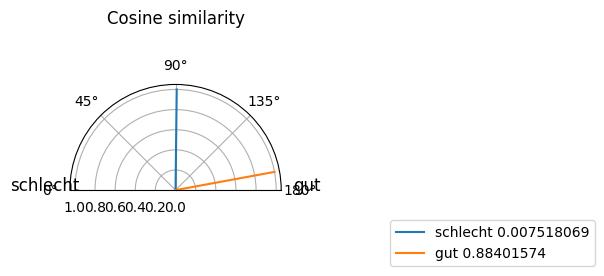

[(0.20278977, 'schlecht'), (0.935188, 'gut')]


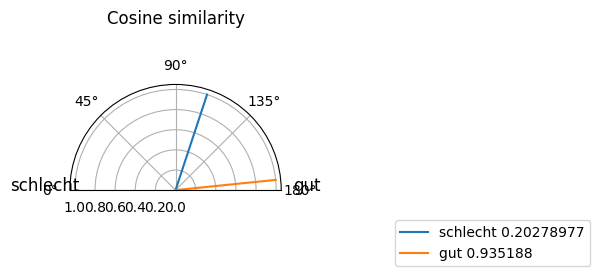

In [51]:
import lib
antonym_list = [
("gut", "schlecht"),
]

word_list = ['gut', 'schlecht']

cos_sim = lib.we_basics('./model/sentences_korpus1_min_count.model', antonym_list, word_list)
lib.plot_cosine_similarity(cos_sim, antonym_list, word_list)
cos_sim = lib.we_basics('./model/sentences_korpus3_min_count.model', antonym_list, word_list)
lib.plot_cosine_similarity(cos_sim, antonym_list, word_list)

[(-0.11344068, 'Solidarität')]


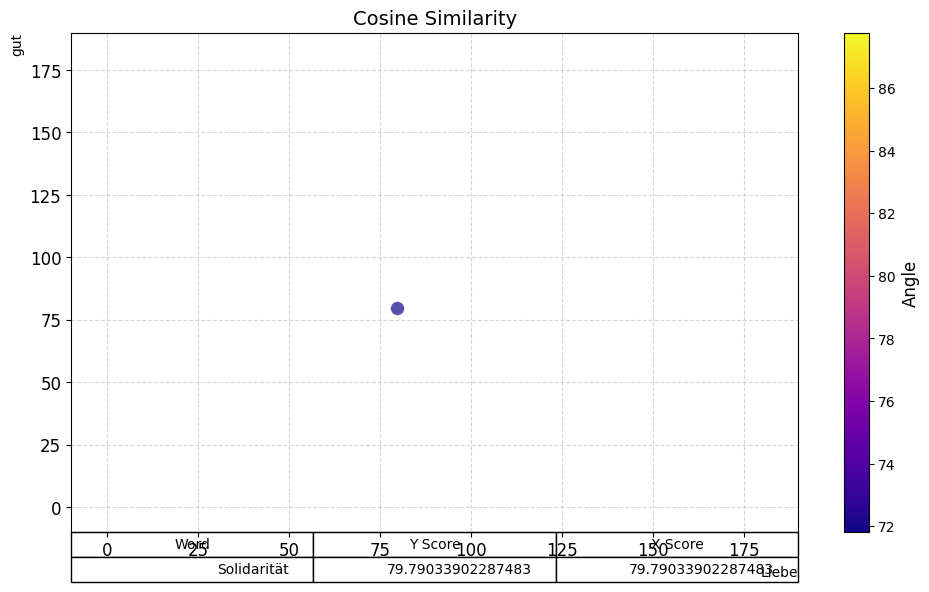

In [47]:
import lib
antonym_list = [
("gut", "schlecht"),
]

antonym_list_2 = [
('Liebe', 'Hass')
    # ... (Other antonym pairs)
]
word_list = ['Solidarität']
cos_sim = lib.we_basics('./model/compass.model', antonym_list, word_list)
lib.plot_cosine_similarity2(cos_sim, cos_sim, antonym_list=antonym_list, antonym_list2=antonym_list_2, word_list=word_list)